In [1]:
#### Importing Libraries ####

import pandas as pd
import numpy as np
import random
import seaborn as sn
import matplotlib.pyplot as plt



In [2]:
dataset = pd.read_csv('churn_data.csv') # Users who were 60 days enrolled, churn in the next 30

In [3]:
dataset.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [5]:
dataset.describe() # Distribution of Numerical Variables

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [6]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [7]:
dataset.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [8]:
dataset=dataset[pd.notnull(dataset['age'])]

In [9]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26996 entries, 0 to 26999
Data columns (total 29 columns):
user                       26996 non-null int64
churn                      26996 non-null int64
age                        26996 non-null float64
housing                    26996 non-null object
deposits                   26996 non-null int64
withdrawal                 26996 non-null int64
purchases_partners         26996 non-null int64
purchases                  26996 non-null int64
cc_taken                   26996 non-null int64
cc_recommended             26996 non-null int64
cc_disliked                26996 non-null int64
cc_liked                   26996 non-null int64
cc_application_begin       26996 non-null int64
app_downloaded             26996 non-null int64
web_user                   26996 non-null int64
app_web_user               26996 non-null int64
ios_user                   26996 non-null int64
android_user               26996 non-null int64
registered_phones       

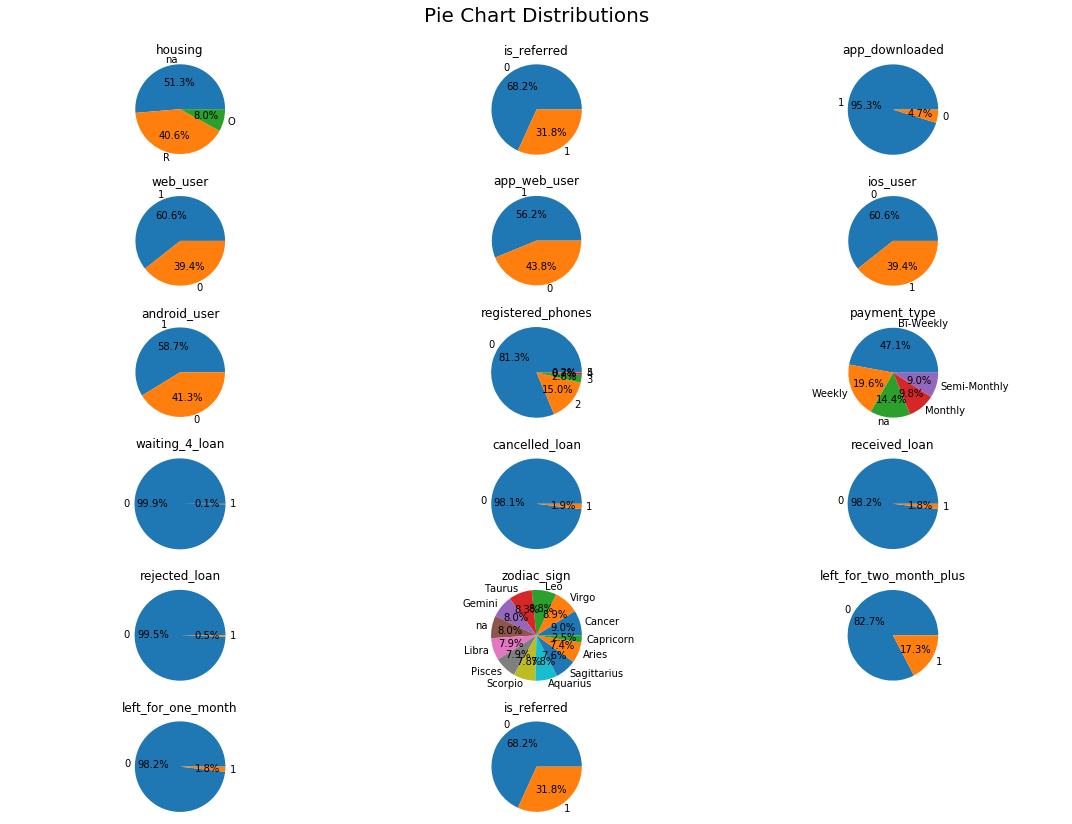

In [11]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [12]:
## Exploring Uneven Features
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()


0    27
1     8
Name: churn, dtype: int64

In [13]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()


1    274
0    234
Name: churn, dtype: int64

In [14]:
dataset[dataset2.received_loan == 1].churn.value_counts()


1    292
0    199
Name: churn, dtype: int64

In [15]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()


1    107
0     25
Name: churn, dtype: int64

In [16]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

In [17]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

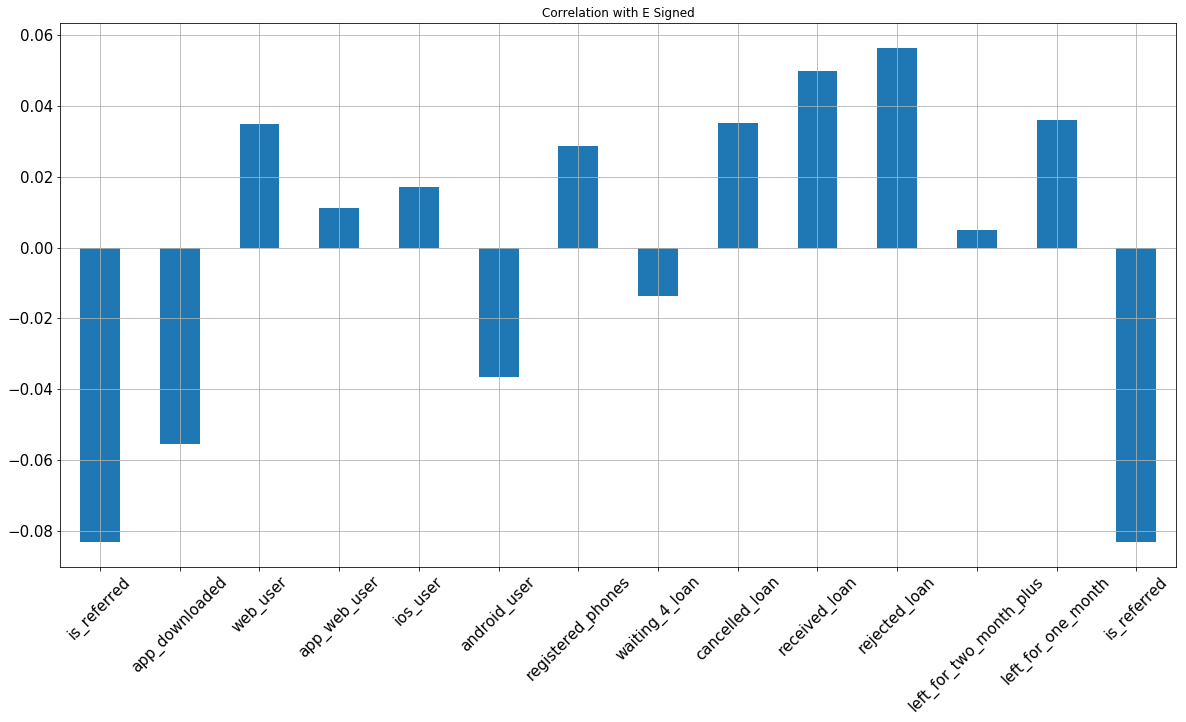

In [18]:
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign'])
dataset2.corrwith(dataset.churn).plot.bar(
        figsize = (20, 10), title = "Correlation with E Signed", fontsize = 15,
        rot = 45, grid = True)


In [19]:

## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset2.corr()
corr.head()

,is_referred,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,is_referred
is_referred,1.000000,0.152472,0.053898,0.114101,0.081334,-0.003460,0.068209,-0.002499,-0.006175,-0.020918,-0.022780,0.031459,-0.037725,1.000000
app_downloaded,0.152472,1.000000,-0.149679,0.252834,0.180035,0.266326,0.102973,0.003205,-0.010095,0.016053,-0.004323,-0.014080,0.005457,0.152472
web_user,0.053898,-0.149679,1.000000,0.912722,0.057228,-0.113570,0.066851,-0.017310,0.023472,0.027444,0.013028,0.048120,0.037097,0.053898
app_web_user,0.114101,0.252834,0.912722,1.000000,0.128411,-0.005246,0.107045,-0.015901,0.019556,0.033043,0.010531,0.040415,0.039131,0.114101
ios_user,0.081334,0.180035,0.057228,0.128411,1.000000,-0.840084,0.085816,-0.005877,-0.012354,-0.004224,-0.002180,-0.043450,0.011799,0.081334


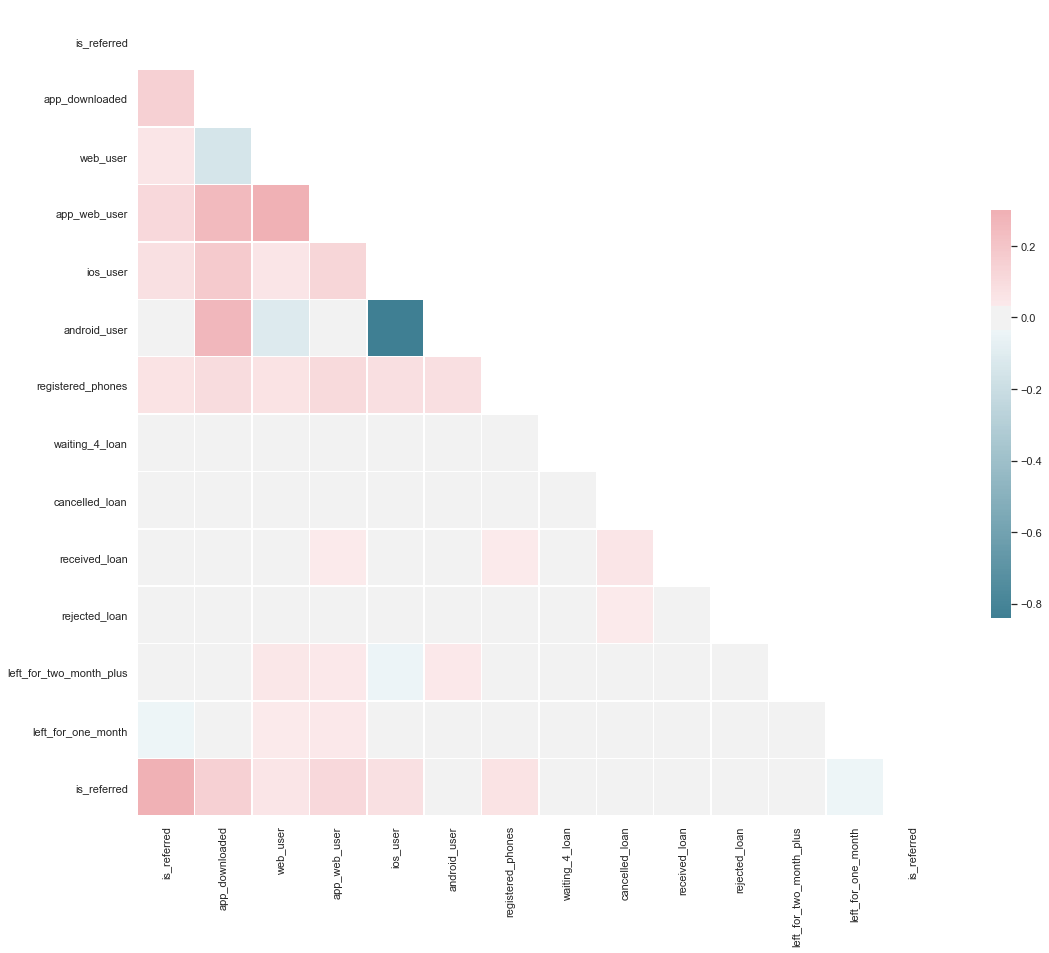

In [20]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [21]:
Newdata=pd.read_csv('new_churn_data.csv')

In [22]:
Newdata.head()

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


In [23]:
user_identifier = Newdata['user']


In [24]:
dataset1 = Newdata.drop(columns = ['user'])

In [25]:
# One-Hot Encoding
dataset1.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [26]:
dataset1 = pd.get_dummies(dataset1)

In [27]:
dataset1.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

In [28]:
dataset1 = dataset1.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26996 entries, 0 to 26995
Data columns (total 43 columns):
churn                        26996 non-null int64
age                          26996 non-null float64
deposits                     26996 non-null int64
withdrawal                   26996 non-null int64
purchases_partners           26996 non-null int64
purchases                    26996 non-null int64
cc_taken                     26996 non-null int64
cc_recommended               26996 non-null int64
cc_disliked                  26996 non-null int64
cc_liked                     26996 non-null int64
cc_application_begin         26996 non-null int64
app_downloaded               26996 non-null int64
web_user                     26996 non-null int64
app_web_user                 26996 non-null int64
ios_user                     26996 non-null int64
android_user                 26996 non-null int64
registered_phones            26996 non-null int64
waiting_4_loan               26996 non-

In [29]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset1.drop(columns = 'churn'), dataset1['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [30]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [31]:
# Balancing the Training Set
y_train.value_counts()

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    higher = neg_index
    lower = pos_index

random.seed(0)
higher = np.random.choice(higher, size=len(lower))
lower = np.asarray(lower)
new_indexes = np.concatenate((lower, higher))

X_train = X_train.loc[new_indexes,]
y_train = y_train[new_indexes]

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """


In [33]:
#### Model Building ####

### Comparing Models

## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Linear Regression (Lasso)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.615556,0.525143,0.738585,0.613839


In [35]:
## SVM (rbf)
from sklearn.svm import SVC
classifier = SVC(random_state = 0, kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['SVM (RBF)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [36]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)

In [37]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.615556,0.525143,0.738585,0.613839
1,SVM (RBF),0.632037,0.540163,0.743509,0.625730
2,Random Forest (n=100),0.681481,0.591329,0.744852,0.659271


Test Data Accuracy: 0.6815


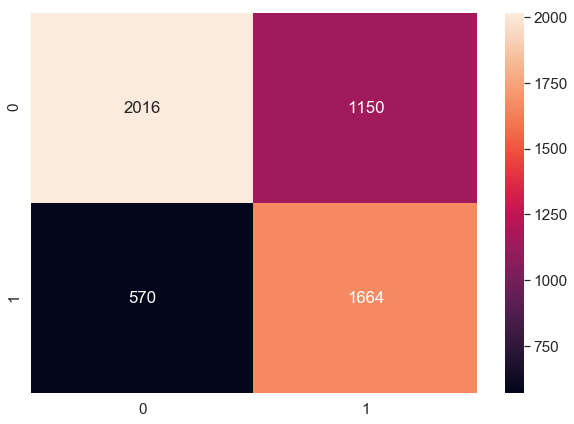

In [38]:
## Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [39]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.615556,0.525143,0.738585,0.613839
1,SVM (RBF),0.632037,0.540163,0.743509,0.625730
2,Random Forest (n=100),0.681481,0.591329,0.744852,0.659271


In [40]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


Random Forest Classifier Accuracy: 0.78 (+/- 0.02)


In [41]:
#### Feature Selection ####


## Feature Selection
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


In [42]:
X_train.shape

(17880, 42)

In [43]:
# Select Best X Features
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Anuj_sahay\Anaconda3\lib\site-packages\sklearn\

In [44]:
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]


[ True  True  True  True  True False  True False False  True False False
  True  True  True  True False False False False  True False  True  True
 False  True  True False False  True False False False False False  True
 False False False False  True  True]
[ 1  1  1  1  1 14  1 19 20  1 21  8  1  1  1  1 23 16 15 22  1 18  1  1
 13  1  1 12 11  1  7  4 10 17  2  1  3  9  5  6  1  1]


Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_recommended', 'cc_application_begin', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'left_for_two_month_plus',
       'reward_rate', 'is_referred', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Weekly', 'zodiac_sign_Leo', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo'],
      dtype='object')

In [45]:
corr = X_train[X_train.columns[rfe.support_]].corr()

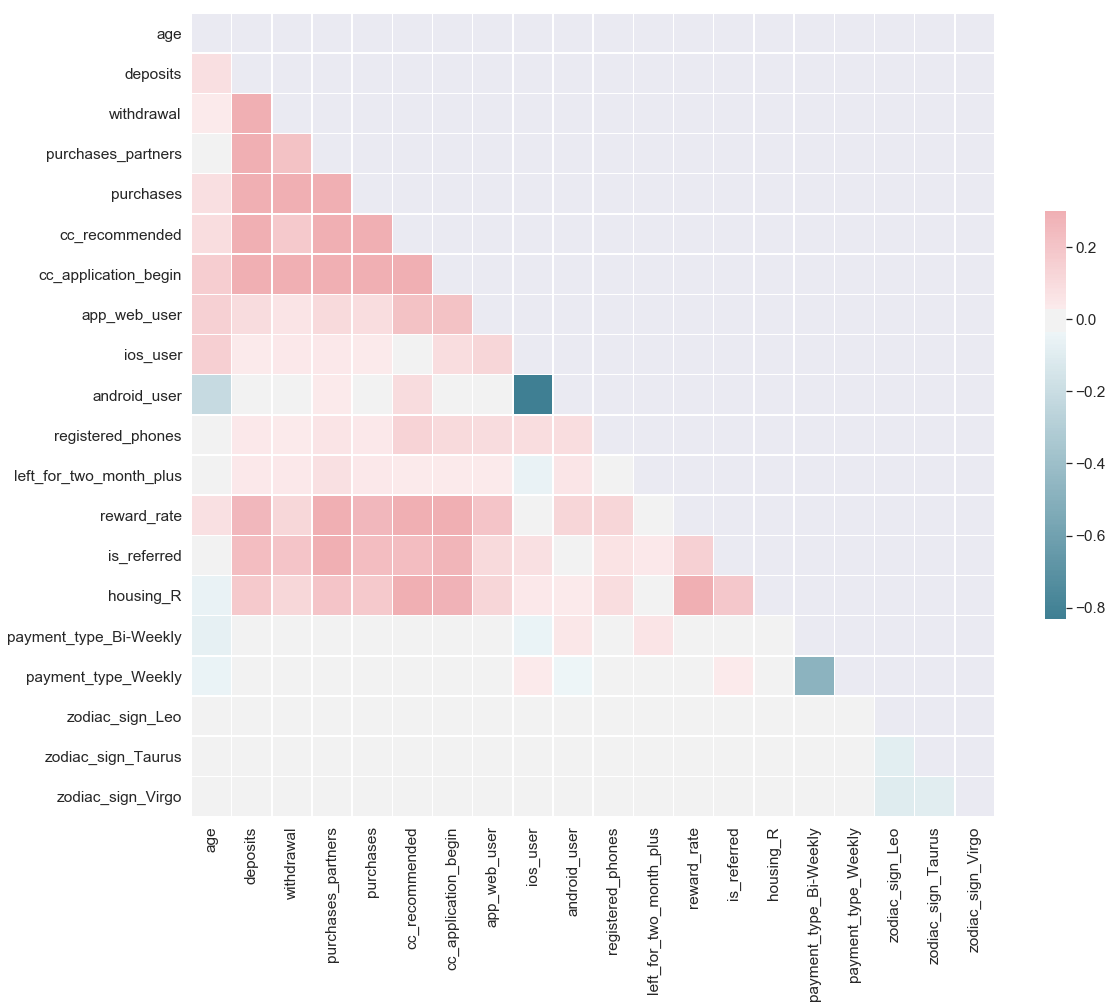

In [46]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]])
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest after new Feature selection', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = results.append(model_results, ignore_index = True)


In [48]:
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Linear Regression (Lasso),0.615556,0.525143,0.738585,0.613839
1,SVM (RBF),0.632037,0.540163,0.743509,0.625730
2,Random Forest (n=100),0.681481,0.591329,0.744852,0.659271
3,Random Forest after new Feature selection,0.676111,0.587324,0.730081,0.650968


In [49]:
## K-fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y = y_train,
                             cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


Random Forest Classifier Accuracy: 0.78 (+/- 0.02)


In [50]:

# Formatting Final Results
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)


In [51]:
final_results.head()

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,1
3,69531,0.0,1
4,25997,0.0,0
